In [1]:
#Import all the required libraries

# System Libraries 
import os, glob
from glob import glob
import pickle
from sys import getsizeof

# Date and Time 
import datetime,time

# Data manipulation
import numpy as np
import pandas as pd
import collections, random, re
from collections import Counter


# Model building 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


#Read/Display  images
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")

In [2]:
# tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array,array_to_img
from tensorflow.keras.utils import plot_model

## 1. Data understanding
1.1 Import the dataset and read image & captions into two seperate variables

1.2 Visualise both the images & text present in the dataset

1.3 Create a dataframe which summarizes the image, path & captions as a dataframe

1.4 Visualise the top 30 occuring words in the captions

1.5 Create a list which contains all the captions & path


In [3]:
## Global Variables

INPUT_PATH = "../input/flickr8k/"
IMAGE_PATH = INPUT_PATH+'Images/'
CAPTIONS_FILE = INPUT_PATH+'captions.txt'
OUTPUT_IMAGE_PATH = "../working/Image/"

### 1.1 Import the dataset and read image & captions into two seperate variables 
### 1.2 Visualise both the images & text present in the dataset

In [4]:
#1.Import the dataset and read image & captions into two seperate variables
#2.Visualise both the images & text present in the dataset

all_imgs = glob(IMAGE_PATH + '*.jpg')
print("The total images present in the dataset: {}".format(len(all_imgs)))
print(all_imgs[0])

The total images present in the dataset: 8091
../input/flickr8k/Images/3226254560_2f8ac147ea.jpg


In [5]:
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
   
    for ax,image in zip(axes, images):
        ax.imshow(io.imread(image), cmap)

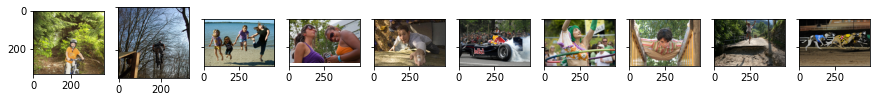

In [6]:
#Plotting last 10 images 
plot_image(all_imgs[8081:])

1. Image are of different sizes, will resize them to (299, 299)

In [7]:
# Creating dataframe column of captions file for visulaizing
# Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.
import pandas as pd
captions_df = pd.read_csv(CAPTIONS_FILE)

pd.set_option('display.max_colwidth',-1) # Set the max column width to see the complete caption
print(captions_df.shape)
captions_df.head()

(40455, 2)


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .


In [8]:
captions_df.nunique()

image      8091 
caption    40201
dtype: int64

### Observation
1. For each image (8091) there are 5 captions (8091*5 = 40455)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


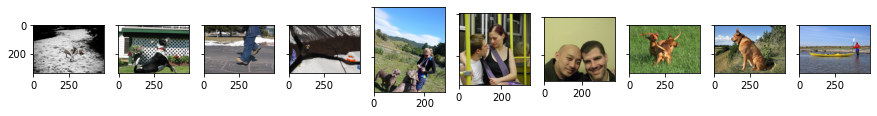

In [9]:
plot_image(all_imgs[:10])
captions_df.head(10)

In [10]:
# Reading captions file
file = open(CAPTIONS_FILE,'rb')
captions_txt = file.read().decode('utf-8')
file.close()
img_cap_corpus=captions_txt.split('\n')
img_cap_corpus.pop(0)## poping first line names of columns (image,caption)

'image,caption'

### 1.3 Create a dataframe which summarizes the image, path & captions as a dataframe

In [11]:
datatxt = []
for line in img_cap_corpus:
    col = line.split(',')# Seperates columns image and caption
   
    if len(col)==1:
        continue
    w = col[0].split("_") # seperating image filename to extract the id 
   
    w[1] = IMAGE_PATH + col[0] # saving complete path of image file for building model
    datatxt.append(w + [col[1].lower()])

df= pd.DataFrame(datatxt,columns=['ID','Path','Captions'])
#df = df.reindex(columns =['ID','Path','Captions'])
uni_filenames= np.unique(df.ID.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df.ID.values).values())

The number of unique file names : 8091
The distribution of the number of captions for each image:


Counter({5: 8091})

In [12]:
df

,ID,Path,Captions
0,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a girl going into a wooden building .
2,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .
3,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playhouse .
4,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a wooden cabin .
...,...,...,...
40450,997722733,../input/flickr8k/Images/997722733_0cb5439472.jpg,a man in a pink shirt climbs a rock face
40451,997722733,../input/flickr8k/Images/997722733_0cb5439472.jpg,a man is rock climbing high in the air .
40452,997722733,../input/flickr8k/Images/997722733_0cb5439472.jpg,a person in a red shirt climbing up a rock face covered in assist handles .
40453,997722733,../input/flickr8k/Images/997722733_0cb5439472.jpg,a rock climber in a red shirt .


### Create the vocabulary & the counter for the captions

In [13]:
all_img_id= df.ID#store all the image id 
all_img_vector= df.Path#store all the image path here
annotations= df.Captions#store all the captions here


print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(set(all_img_vector))))
print(annotations[:10])

Total captions present in the dataset: 40455
Total images present in the dataset: 8091
0    a child in a pink dress is climbing up a set of stairs in an entry way .              
1    a girl going into a wooden building .                                                 
2    a little girl climbing into a wooden playhouse .                                      
3    a little girl climbing the stairs to her playhouse .                                  
4    a little girl in a pink dress going into a wooden cabin .                             
5    a black dog and a spotted dog are fighting                                            
6    a black dog and a tri-colored dog playing with each other on the road .               
7    a black dog and a white dog with brown spots are staring at each other in the street .
8    two dogs of different breeds looking at each other on the road .                      
9    two dogs on pavement moving toward each other .                                 

In [14]:
uni_filenames = np.unique(df.ID.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df.ID.values).values())

The number of unique file names : 8091
The distribution of the number of captions for each image:


Counter({5: 8091})

In [15]:

## Creating vocabulary of all words present in captions

def split_sentence(sentence):
    return list(filter(lambda x: len(x) > 0, re.split('\W+', sentence.lower())))

def generate_vocabulary(captions):
      
    words = []

    for sentence in captions:
        sent_words = split_sentence(sentence)
        for word in sent_words: 
            words.append(word)
    return sorted(words)
    
vocab = generate_vocabulary(df.Captions)

#### Creating captions Counter

In [16]:
vocabulary =  Counter(vocab)

df_word = pd.DataFrame.from_dict(vocabulary, orient='index')

df_word = df_word.sort_values(by=[0],ascending=False).reset_index()
df_word =df_word.rename(columns={'index':'word', 0:'count'})


### 1.4. Visualize the top 30 occuring words in the captions


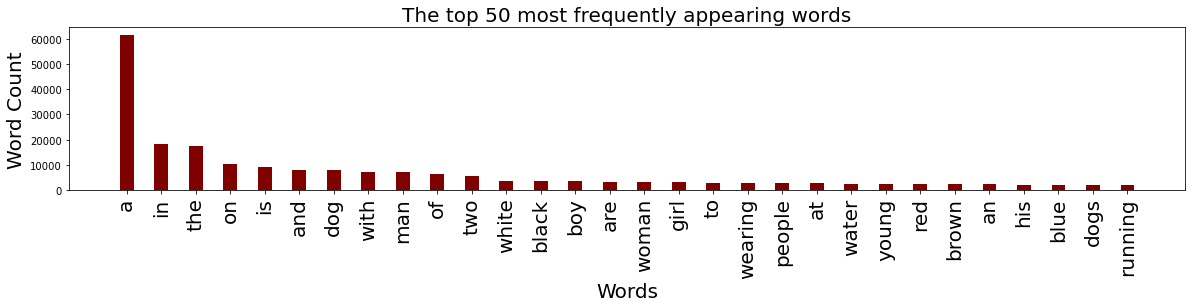

In [17]:
#Visualize the top 30 occuring words in the captions

def plthist(index,words,count, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(words,count,color='maroon', width =0.4)
    plt.xlabel("Words",  fontsize=20) 
    plt.ylabel("Word Count",rotation=90,fontsize=20) 
   # plt.yticks(fontsize=20)
    plt.xticks(index,words,rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()
    
words = list(df_word[:30].word)

count =list(df_word['count'][:30])
plthist(list(range(0,30)),words,count)

### 5.Create a list which contains all the captions & path

In [18]:
#Create a list which contains all the captions

#adding  the <start> & <end> token to all the captions 
df['Captions']=df.Captions.apply(lambda x : f"<start> {x} <end>")
annotations = df.Captions
# Find max length of sequence
max_length = max(df.Captions.apply(lambda x : len(x.split())))

#Create a list which contains all the path to the images
unique_img_path= sorted(set(all_img_vector))#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_vector)))
print("Unique images present in the dataset: " + str(len(unique_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455
Unique images present in the dataset: 8091


In [19]:
def plot_image_captions(Pathlist,captionsList,fig,count=2,npix=299,nimg=2):
        image_load = load_img(Path,target_size=(npix,npix,3))
        ax = fig.add_subplot(nimg,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        
        count +=1
        ax = fig.add_subplot(nimg,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=20)
        

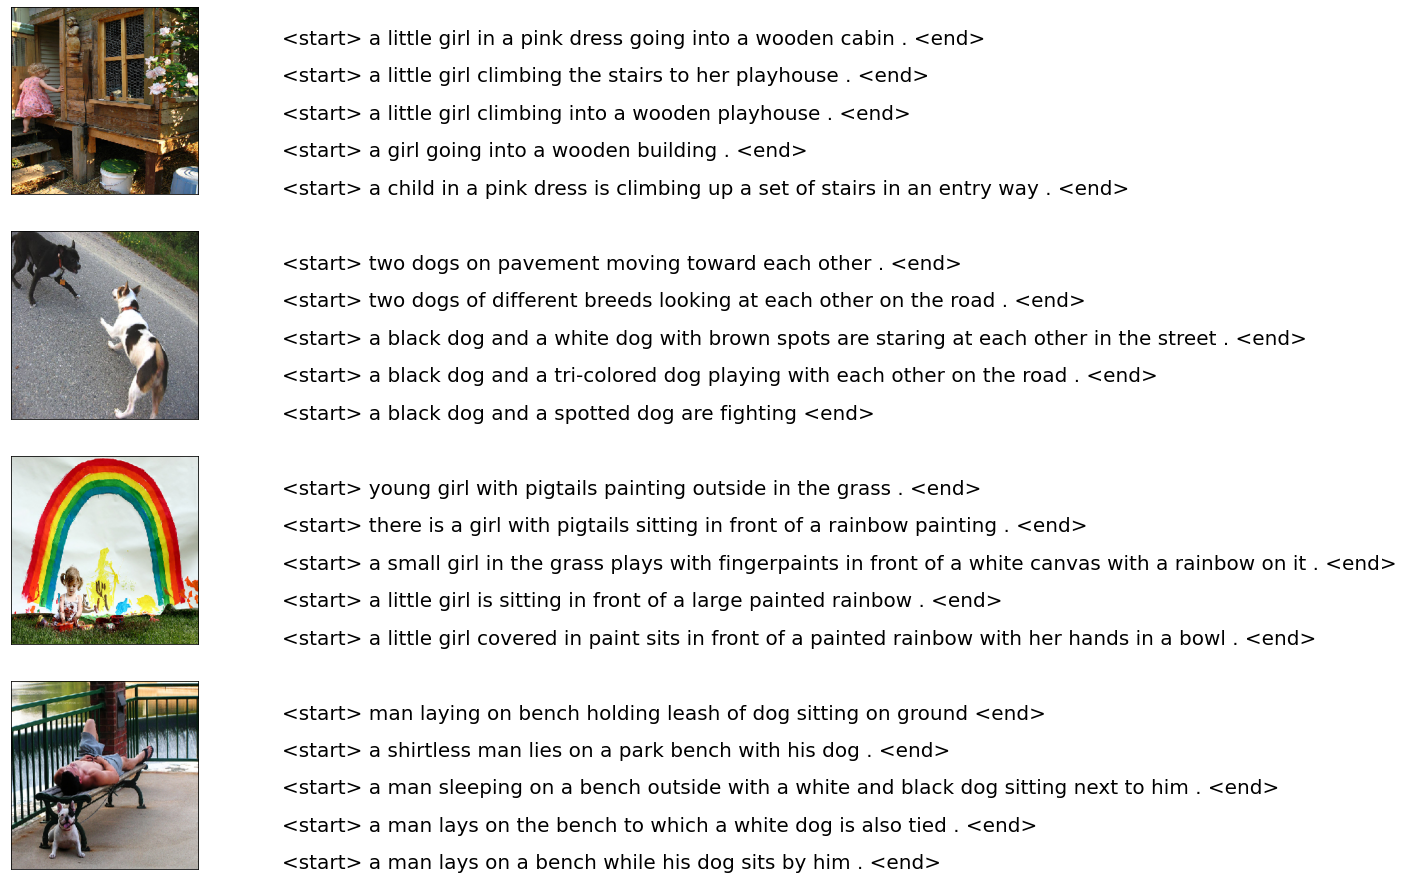

In [20]:
# Images 
fig = plt.figure(figsize=(10,20))
count = 1
    
for Path in df[:20].Path.unique():
    captions = list(df["Captions"].loc[df.Path== Path].values)
    plot_image_captions(Path,captions,fig,count,299,5)
    count +=2
plt.show()

## 2. Pre-Processing the captions
2.1 Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.2 Replace all other words with the unknown token "UNK" .

2.3 Create word-to-index and index-to-word mappings.

2.4 Pad all sequences to be the same length as the longest one.

### 2.1 Create the tokenizer
 Creating captions Counter, and dataframe of top 5000 frequently used words, for observation.

In [22]:
def tokenize_captions(top_cap,captions):
    special_chars = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_freq_words,
                                                  oov_token="UNK",
                                                  filters=special_chars)
    tokenizer.fit_on_texts(captions)
    
    # Adding PAD to tokenizer list
    tokenizer.word_index['PAD'] = 0
    tokenizer.index_word[0] = 'PAD'   
   
    return tokenizer  
    

In [23]:
top_freq_words = 5000
tokenizer = tokenize_captions(top_freq_words,annotations)
# Pad each vector to the max_length of the captions ^ store it to a vairable

# Create the tokenized vectors
cap_seqs = tokenizer.texts_to_sequences(annotations)
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(cap_seqs, padding='post')

print("The shape of Caption vector is :" + str(cap_vector.shape))
print(cap_vector[:5])

The shape of Caption vector is :(40455, 35)
[[   3    2   44    5    2   89  173    8  116   52    2  389   13  385
     5   29    1  670    4    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3    2   20  313   64    2  197  120    4    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3    2   39   20  116   64    2  197 2368    4    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3    2   39   20  116    6  385   21   63 2368    4    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3    2   39   20    5    2   89  173  313   64    2  197 2887    4
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]]


In [24]:
# Maximum length of sequence 
max_length = max([len(cap) for cap in cap_seqs])
print("Shape of caption vector :", cap_vector.shape, )
print("Maximium length of sequence = ", max_length)

Shape of caption vector : (40455, 35)
Maximium length of sequence =  35


In [25]:
# Create word-to-index and index-to-word mappings.
def print_word_2_index(word):
    print("Word = {}, index = {}".format(word, tokenizer.word_index[word]))

          
print( "Word 2 index mapping")
print_word_2_index("<start>")
print_word_2_index("PAD")

Word 2 index mapping
Word = <start>, index = 3
Word = PAD, index = 0


In [26]:
# Create word-to-index and index-to-word mappings.
def print_index_2_word(index):
    print("Index = {}, Word = {}".format(index, tokenizer.index_word[index]))

          
print( "Index 2 word mapping")
print_index_2_word(5)
print_index_2_word(4999)

Index 2 word mapping
Index = 5, Word = in
Index = 4999, Word = daisies


In [27]:
# Word count of your tokenizer to see the Top 30 occuring words after text processing
word_count = tokenizer.word_counts
import operator
word_count = sorted(word_count.items(), key=operator.itemgetter(1),reverse=True)
for k,v in word_count[:30]:
    print (k,v)
    

a 61436
<start> 40455
<end> 40455
in 18193
the 17677
on 10369
is 9069
and 8066
dog 7958
with 7308
man 7172
of 6504
two 5550
white 3728
black 3641
boy 3534
are 3365
woman 3320
girl 3284
to 3008
wearing 2917
people 2837
at 2820
water 2683
young 2610
red 2571
brown 2484
an 2358
his 2255
blue 2136


## 3. Pre-processing the images

## Load the pretrained Imagenet weights of Inception net V3

3.1 To save the memory(RAM) from getting exhausted, extract the features of the image using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

3.2 Resize them into the shape of (299, 299)

3.3 Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 


In [28]:
#3.1 To save the memory(RAM) from getting exhausted, extract the features of the image using the last layer of pre-trained model InceptionV3


image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87916544/87910968 [==============================] - 0s 0us/step


In [29]:
#3.2.Resize them into the shape of (299, 299) for InceptionV3
#3.3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3.

def preprocess_image(image_path):
    shape = (299, 299)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,shape)
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, image_path

In [30]:
#### Installing progrss bar
#!pip install --upgrade pip
#pip install -q tqdm

In [31]:
# Creating Image dataset of preprocessed images 

BATCH_SIZE = 64
shape = (299, 299)
encode = sorted (set(all_img_vector))

image_dataset = tf.data.Dataset.from_tensor_slices(encode)
image_dataset = image_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)

In [32]:
sample_img_batch, sample_cap_batch = next(iter(image_dataset))
print(sample_img_batch.shape) #(batch_size, 299,299,3)
print(sample_cap_batch.shape) #(batch_size, max_len)

(64, 299, 299, 3)
(64,)


## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)

In [33]:
from tqdm import tqdm

In [34]:


os.mkdir("Image")
all_imgs_npy = []
for img,path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))
    
    for bf, p in zip(batch_features, path):
        file_name = p.numpy().decode("utf-8").split('/')[-1]
        all_imgs_npy.append(file_name)
        np.save( OUTPUT_IMAGE_PATH +file_name, bf.numpy())

100%|██████████| 127/127 [01:01<00:00,  2.05it/s]


In [35]:
#all_imgs_npy = glob(OUTPUT_IMAGE_PATH +"*.*")
print("The total images present in the dataset: {}".format(len(all_imgs_npy)))
print(all_imgs_npy[0])

The total images present in the dataset: 8091
1000268201_693b08cb0e.jpg


In [36]:
img_to_cap_vector = collections.defaultdict(list)

for img,cap in zip(all_img_vector,cap_vector):
    #print(img,cap)
    img_to_cap_vector[img].append(cap)

In [37]:
print(img_to_cap_vector[IMAGE_PATH+"2330062180_355ccbceb5.jpg"])

[array([  3,   2,  10,  33,  38,   2,  45, 169, 134,   4,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32), array([ 3,  2, 10, 33, 34, 45,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0], dtype=int32), array([   3,    2,  393,   10, 1384,  123,    6,   45,  169,  134,    4,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32), array([ 3,  2, 15, 10,  8, 33, 34,  6, 45,  4,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0], dtype=int32), array([ 3,  2, 15, 10, 33, 34,  6, 45,  4,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0], dtype=int32)]


In [38]:
def vector_to_sentence(caplist):
    captions_word =[]
    #print(caplist)
    for captions in caplist:
        #print(captions)
        list_caption = list(captions)

        captions_word.append(' '.join(tokenizer.index_word[i] for i in list_caption))
    return captions_word
        

## 4. Create the train & test data 
4.1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

4.2.Make sure you have done Shuffle and batch while building the dataset

4.3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [39]:
#4.1 Combine both images & captions to create the train & test dataset using tf.data.Dataset API. 
#Create the train-test spliit using 80-20 ratio & random state = 42
tf.random.set_seed(42)
# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]
#print(img_name_train_keys, img_name_val_keys)
image_train = []
captions_train = []
for imgt in img_name_train_keys:
    captions_len = len(img_to_cap_vector[imgt])
    #print(captions_len)
    image_train.extend([imgt] * captions_len)
    captions_train.extend(img_to_cap_vector[imgt])

image_test = []
captions_test = []
for imgtest in img_name_val_keys:
    captions_len = len(img_to_cap_vector[imgtest])
    image_test.extend([imgtest] * captions_len)
    captions_test.extend(img_to_cap_vector[imgtest])

In [40]:
print("Image_train = {}, Captions_train = {}".format(len(image_train), len(captions_train)))

print("Image_test = {}, Captions_test = {}".format(len(image_test), len(captions_test)))

Image_train = 32360, Captions_train = 32360
Image_test = 8095, Captions_test = 8095


In [41]:
def get_file_name(filename):
    return (IMAGE_PATH + filename)

def vector_to_sentence(caplist):
    captions_word =[]
  
    for captions in caplist:
        list_caption = list(captions)

        captions_word.append(' '.join(tokenizer.index_word[i] for i in list_caption))
    return captions_word

In [42]:
caplist_train = []
#for i in range(1,10):
captions_word = vector_to_sentence(list(captions_train[0:30]))
print(captions_word[28:])


['<start> three adults and one child are walking along a paved path that is snow covered <end> PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD', '<start> two adults <end> PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD']


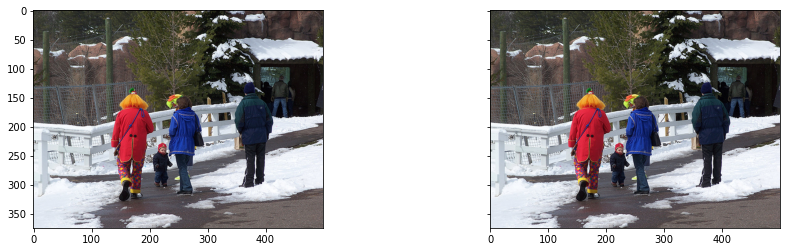

In [43]:
#print(image_train[28],image_train[29])
filename = (IMAGE_PATH + image_train[28].split('/')[-1]).replace(".npy","")
filename1 = (IMAGE_PATH + image_train[29].split('/')[-1]).replace(".npy","")

plot_image([filename,filename1],caplist_train)


# Extracting features from each image in the dataset

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)

In [44]:
# Load the numpy files
def map_func(img_name, cap):
    filename = OUTPUT_IMAGE_PATH + img_name.decode('utf-8').split('/')[-1] + ".npy"
    img_tensor = np.load(filename)
    return img_tensor, cap

In [45]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
train_dataset = tf.data.Dataset.from_tensor_slices((image_train, captions_train))
# Use map to load the numpy files in parallel
train_dataset = train_dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [46]:

test_dataset = tf.data.Dataset.from_tensor_slices((image_test, captions_test))
# Use map to load the numpy files in parallel
test_dataset = test_dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

In [47]:
train_img_batch, train_cap_batch = next(iter(train_dataset))
print(train_img_batch.shape) #(batch_size, 8*8,2048)
print(train_cap_batch.shape) #(batch_size, max_len)

(64, 64, 2048)
(64, 35)


In [48]:
test_img_batch, test_cap_batch = next(iter(test_dataset))
print(test_img_batch.shape) #(batch_size, 8*8,2048)
print(test_cap_batch.shape) #(batch_size, max_len)

(64, 64, 2048)
(64, 35)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [49]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000


# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

embedding_dim = 256 
units = 512
vocab_size = top_freq_words + 1 #top 5,000 words +1
train_num_steps = len(image_train) // BATCH_SIZE
test_num_steps = len(image_test) // BATCH_SIZE

## Encoder

In [50]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        #Dense layer with relu activation
        self.dense = tf.keras.layers.Dense(embedding_dim)
        
    def call(self, features):
        features = self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        return features

## Attention Model

In [51]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units)#build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden,1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))
        score = self.V(attention_hidden_layer)# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.nn.softmax(score,axis=1)# extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features  #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector,axis=1)# reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

## Decoder

In [52]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size,embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units)#build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)#build your Dense layer
        self.attention = Attention_model(self.units)

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features,hidden)#create your context vector & attention weights from attention model
        # embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  self.embed(x)
        embed =  tf.concat([tf.expand_dims(context_vector,1),embed],axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed)# Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        x = self.d1(output)
        x = tf.reshape(x, (-1, x.shape[2])) # shape : (batch_size * max_length, hidden_size)
        x = self.d2(x) # shape : (batch_size * max_length, vocab_size)
        
        return x,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [53]:
encoder=Encoder(embedding_dim)
decoder=Decoder(embedding_dim, units, vocab_size)

In [54]:
features=encoder(train_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * train_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [56]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [57]:
learning_rate = CustomSchedule(embedding_dim)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                    epsilon=1e-9)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
metric = tf.keras.metrics.Mean('train_loss',dtype=tf.float32)

In [58]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [59]:
checkpoint_path_ckpt = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer,
                           metrics=metric)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path_ckpt, max_to_keep=5)

In [60]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    
    ckpt.restore(ckpt_manager.latest_checkpoint)

In [61]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        features = encoder(img_tensor,training =True)

        for i in range(1, target.shape[1]):
          # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)

          # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))
    metric(loss)    
    return loss, total_loss

In [62]:
@tf.function
def test_step(img_tensor, target):
    loss = 0

    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    features = encoder(img_tensor)
    for i in range(1, target.shape[1]):
          # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)
            predicted_id = tf.argmax(predictions[0])
            dec_input = tf.expand_dims([predicted_id] * target.shape[0] , 1)
   
    avg_loss = (loss / int(target.shape[1]))
        
    return loss, avg_loss

In [63]:
def test_loss_cal(dataset):
    total_loss = 0

    for (batch,(img_tensor,target)) in enumerate(dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
   
    
    return total_loss/int(target.shape[1])

In [64]:
train_loss = tf.keras.metrics.Mean('train_loss',dtype=tf.float32)

In [77]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
    avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  3%|▎         | 1/30 [01:18<37:43, 78.07s/it]

For epoch: 1, the train loss is 0.436, & test loss is 10.516
Time taken for 1 epoch 77.91051292419434 sec

Test loss has been reduced from 100.000 to 10.516


  7%|▋         | 2/30 [02:37<36:41, 78.61s/it]

For epoch: 2, the train loss is 0.417, & test loss is 10.685
Time taken for 1 epoch 78.99334907531738 sec



 10%|█         | 3/30 [03:54<35:12, 78.23s/it]

For epoch: 3, the train loss is 0.398, & test loss is 10.875
Time taken for 1 epoch 77.76748037338257 sec



 13%|█▎        | 4/30 [05:12<33:49, 78.07s/it]

For epoch: 4, the train loss is 0.381, & test loss is 11.183
Time taken for 1 epoch 77.82867980003357 sec



 17%|█▋        | 5/30 [06:31<32:35, 78.21s/it]

For epoch: 5, the train loss is 0.365, & test loss is 11.383
Time taken for 1 epoch 78.46406483650208 sec



 20%|██        | 6/30 [07:48<31:10, 77.93s/it]

For epoch: 6, the train loss is 0.350, & test loss is 11.645
Time taken for 1 epoch 77.38989114761353 sec



 23%|██▎       | 7/30 [09:06<29:56, 78.09s/it]

For epoch: 7, the train loss is 0.337, & test loss is 11.789
Time taken for 1 epoch 78.41189432144165 sec



 27%|██▋       | 8/30 [10:24<28:34, 77.94s/it]

For epoch: 8, the train loss is 0.323, & test loss is 12.160
Time taken for 1 epoch 77.62409353256226 sec



 30%|███       | 9/30 [11:43<27:20, 78.11s/it]

For epoch: 9, the train loss is 0.311, & test loss is 12.411
Time taken for 1 epoch 78.48881697654724 sec



 33%|███▎      | 10/30 [13:00<25:57, 77.85s/it]

For epoch: 10, the train loss is 0.299, & test loss is 12.580
Time taken for 1 epoch 77.25794744491577 sec



 37%|███▋      | 11/30 [14:17<24:36, 77.71s/it]

For epoch: 11, the train loss is 0.289, & test loss is 12.702
Time taken for 1 epoch 77.38954424858093 sec



 40%|████      | 12/30 [15:35<23:18, 77.69s/it]

For epoch: 12, the train loss is 0.279, & test loss is 13.066
Time taken for 1 epoch 77.65123581886292 sec



 43%|████▎     | 13/30 [16:52<21:58, 77.56s/it]

For epoch: 13, the train loss is 0.268, & test loss is 13.343
Time taken for 1 epoch 77.26024508476257 sec



 47%|████▋     | 14/30 [18:10<20:40, 77.53s/it]

For epoch: 14, the train loss is 0.260, & test loss is 13.447
Time taken for 1 epoch 77.44636964797974 sec



 50%|█████     | 15/30 [19:28<19:25, 77.72s/it]

For epoch: 15, the train loss is 0.251, & test loss is 13.613
Time taken for 1 epoch 78.15321159362793 sec



 53%|█████▎    | 16/30 [20:46<18:10, 77.86s/it]

For epoch: 16, the train loss is 0.243, & test loss is 13.910
Time taken for 1 epoch 78.20010542869568 sec



 57%|█████▋    | 17/30 [22:04<16:52, 77.92s/it]

For epoch: 17, the train loss is 0.236, & test loss is 13.989
Time taken for 1 epoch 78.04041647911072 sec



 60%|██████    | 18/30 [23:21<15:33, 77.76s/it]

For epoch: 18, the train loss is 0.229, & test loss is 14.184
Time taken for 1 epoch 77.37711691856384 sec



 63%|██████▎   | 19/30 [24:39<14:15, 77.79s/it]

For epoch: 19, the train loss is 0.223, & test loss is 14.353
Time taken for 1 epoch 77.859290599823 sec



 67%|██████▋   | 20/30 [25:57<12:57, 77.74s/it]

For epoch: 20, the train loss is 0.216, & test loss is 14.623
Time taken for 1 epoch 77.63134694099426 sec



 70%|███████   | 21/30 [27:15<11:40, 77.82s/it]

For epoch: 21, the train loss is 0.210, & test loss is 14.749
Time taken for 1 epoch 78.01278924942017 sec



 73%|███████▎  | 22/30 [28:33<10:23, 77.88s/it]

For epoch: 22, the train loss is 0.205, & test loss is 14.847
Time taken for 1 epoch 77.99961423873901 sec



 77%|███████▋  | 23/30 [29:50<09:04, 77.76s/it]

For epoch: 23, the train loss is 0.201, & test loss is 15.172
Time taken for 1 epoch 77.47152256965637 sec



 80%|████████  | 24/30 [31:08<07:47, 77.84s/it]

For epoch: 24, the train loss is 0.196, & test loss is 15.259
Time taken for 1 epoch 78.03188037872314 sec



 83%|████████▎ | 25/30 [32:26<06:28, 77.70s/it]

For epoch: 25, the train loss is 0.190, & test loss is 15.558
Time taken for 1 epoch 77.38772559165955 sec



 87%|████████▋ | 26/30 [33:43<05:10, 77.66s/it]

For epoch: 26, the train loss is 0.186, & test loss is 15.584
Time taken for 1 epoch 77.56367635726929 sec



 90%|█████████ | 27/30 [35:01<03:52, 77.58s/it]

For epoch: 27, the train loss is 0.182, & test loss is 15.868
Time taken for 1 epoch 77.37699699401855 sec



 93%|█████████▎| 28/30 [36:18<02:34, 77.47s/it]

For epoch: 28, the train loss is 0.179, & test loss is 15.952
Time taken for 1 epoch 77.20468711853027 sec



 97%|█████████▋| 29/30 [37:35<01:17, 77.49s/it]

For epoch: 29, the train loss is 0.175, & test loss is 16.071
Time taken for 1 epoch 77.54152965545654 sec



100%|██████████| 30/30 [38:52<00:00, 77.76s/it]

For epoch: 30, the train loss is 0.172, & test loss is 16.130
Time taken for 1 epoch 76.85704207420349 sec



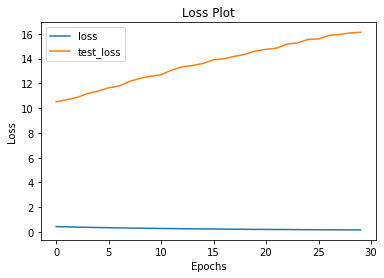

In [78]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(['loss','test_loss'])
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

## Greedy Search

In [79]:
def init_features(image):
    temp_input = tf.expand_dims(preprocess_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    return features,dec_input

In [80]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)
    features,dec_input = init_features(image)
    
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,features,hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        #extract the predicted id(embedded value) which carries the max value
        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
       # print(predicted_id)
        result.append(tokenizer.index_word[predicted_id])#map the id to the word from tokenizer and append the value to the result list

        if (tokenizer.index_word[predicted_id] == "<end>"):
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


## Beam Search

In [81]:
def beam_evaluate(image, beam_index = 3 ):#your value for beam index

    #write your code to evaluate the result using beam search
    start = [tokenizer.word_index["<start>"]]
    # result [i][0] : word index of the ith word in result
    # result [i][1] : probability of ith word being predicted
    result = [[start, 0.0]]
    attention_plot = np.zeros((max_length,attention_features_shape))  
    hidden = decoder.init_state(batch_size=1)
    features,dec_input = init_features(image)
    
    
    while len(result[0][0]) < max_length:
        i = 0 
        temp = []
        for s in result:
            preds, hidden, attention_weights = decoder(dec_input,features,hidden)
            attention_plot = tf.reshape(attention_w,(-1,)).numpy()
            i +=1
            # Getting the top <beam_index>(n) predictions and creating a 
            word_preds = np.argsort(preds[0])[-beam_index:]
            
            
            # new list  to put in the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        result = temp
        # Sorting according to the probabilities
        result = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        result = result[-beam_index:]
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        pred_id = pred_list[-1]       
        if(pred_id ==3):
            break            
                  
        dec_input = tf.expand_dims([pred_id],0)
    
    result = result[-1][0]
    intermediate_caption = [tokenizer.index_word[i] for i in start_word]

    final_caption = []
    
    for i in intermediate_caption:
        if i == '<end>':
            break
        final_caption.append(i)
        
    attention_plot = attention_plot[:len(result),:]
    final_caption = ' '.join(final_caption[1:])
    return final_caption,attention_plot

In [82]:
def plot_attmap(caption, attention_plot, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(attention_plot[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((299, 299), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [83]:
# captions on the validation set
rid = np.random.randint(0, len(image_test))
image = image_test[rid]
#print(image)
image = IMAGE_PATH +(image.split('/')[-1]).replace(".npy","")
print(image)
real_caption = ' '.join([tokenizer.index_word[i] for i in captions_test[rid] if i not in [0]])
result, weight,predictions = evaluate(image)

print ('Real Caption:', real_caption)
print ('Prediction Caption:', ' '.join(result))

../input/flickr8k/Images/2337757064_08c4033824.jpg
Real Caption: <start> a person in a yellow hat is walking across the grass carrying a long pole <end>
Prediction Caption: a man leaves in a field <end>


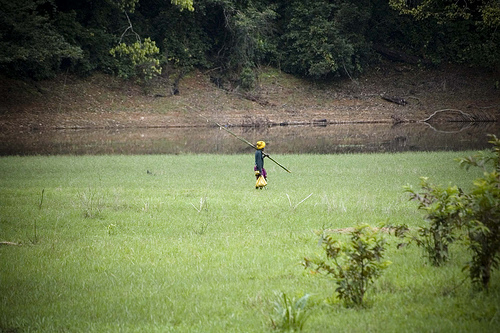

In [84]:
Image.open(image)

In [85]:
# n-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

In [86]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

../input/flickr8k/Images/3388836914_c267cf3a59.jpg
a female tennis player is lining up to take a swing with her racquet a man playing tennis match
BELU score: 16.529888822158657
Real Caption: a female tennis player is lining up to take a swing with her racquet
Prediction Caption: a man playing tennis match


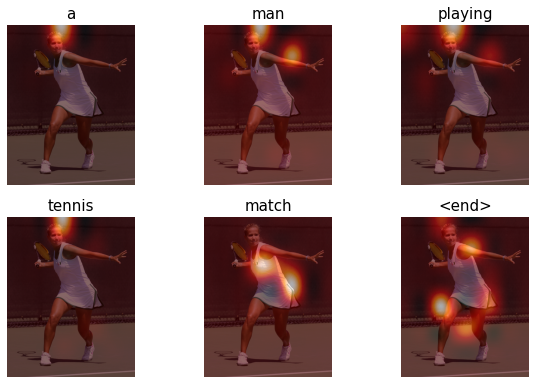

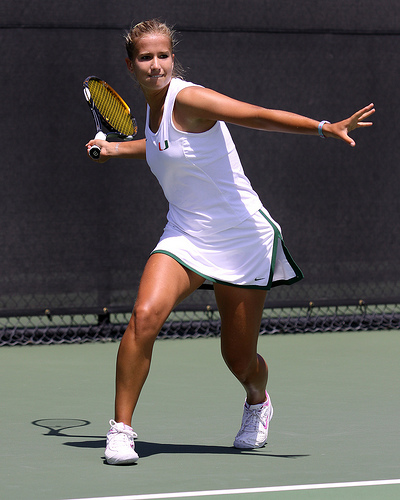

In [89]:
rid = np.random.randint(0, len(image_test))
test_image = image_test[rid]
print(test_image)

real_caption = ' '.join([tokenizer.index_word[i] for i in captions_test[rid] if i not in [0]])
result, weight,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
print(real_caption,pred_caption)
real_appn.append(real_caption.split())
reference = list(real_appn)
candidate = pred_caption.split()
#Cummunilative and n
score = sentence_bleu(reference, candidate, weights=(0,0,1,0))
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, weight, test_image)


Image.open(test_image)

../input/flickr8k/Images/3269087421_1d489abeae.jpg
one man singing next to another man playing the violin man and a man and black man UNK plays the guitar
BELU score: 100.0
Real Caption: one man singing next to another man playing the violin
Prediction Caption: man and a man and black man UNK plays the guitar


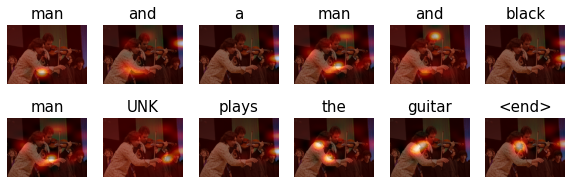

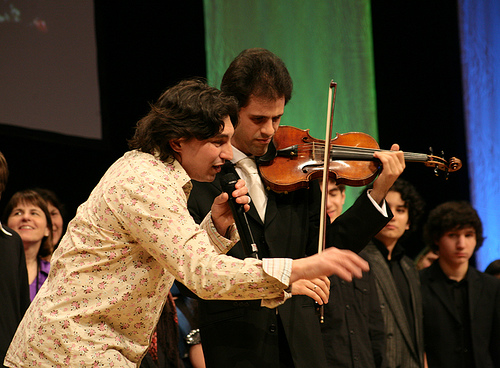

In [88]:
rid = np.random.randint(0, len(image_test))
test_image = image_test[rid]
print(test_image)

real_caption = ' '.join([tokenizer.index_word[i] for i in captions_test[rid] if i not in [0]])
result, weight,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
print(real_caption,pred_caption)
real_appn.append(real_caption.split())
reference = list(real_appn)
candidate = pred_caption.split()
#Cummunilative and n
score = sentence_bleu(reference, candidate, weights=(0,0,1,0))
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, weight, test_image)


Image.open(test_image)

../input/flickr8k/Images/2978024878_a45b282bf4.jpg
two small white dogs wearing muzzles jumping over a small item a golden retriever is playing in a grassy yard
BELU score: 80.07374029168079
Real Caption: two small white dogs wearing muzzles jumping over a small item
Prediction Caption: a golden retriever is playing in a grassy yard


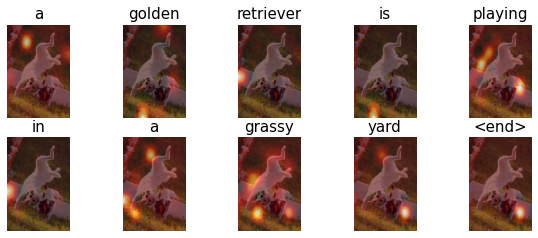

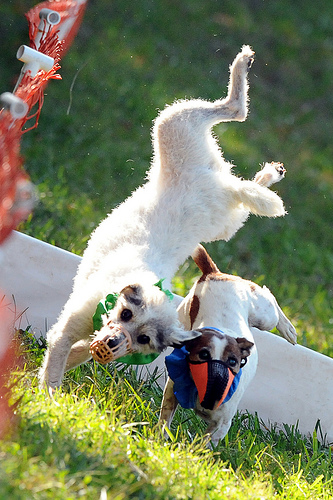

In [90]:
rid = np.random.randint(0, len(image_test))
test_image = image_test[rid]
print(test_image)

real_caption = ' '.join([tokenizer.index_word[i] for i in captions_test[rid] if i not in [0]])
result, weight,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
print(real_caption,pred_caption)
real_appn.append(real_caption.split())
reference = list(real_appn)
candidate = pred_caption.split()
#Cummunilative and n
score = sentence_bleu(reference, candidate, weights=(0,0,1,0))
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, weight, test_image)


Image.open(test_image)